In [1]:
from notebook_tools import *
from matplotlib.pyplot import *
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
variables = ['A'
             ,'Xb'   ,'Pmiss.P()'    ,'Pmiss.Pt()'   ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()' 
             , 'PcmFinalState.P()' , 'PcmFinalState.Pt()'
             , 'Pcm.Px()' , 'Pcm.Py()'  , 'Pcm.Pz()'
             ,'pEdep[0]', 'protons[0].P()', 'pEdep[1]', 'protons[1].P()', 'pEdep[2]', 'protons[2].P()'
             ,'protons[0].Theta()',  'protons[1].Theta()',  'protons[2].Theta()'
             ,'TMath::RadToDeg()*protons[0].Theta()',  'TMath::RadToDeg()*protons[1].Theta()',  'TMath::RadToDeg()*protons[2].Theta()' 
             ,'alpha[0]','alpha[1]','alpha[2]','alpha_q'
             ,'0.938*0.938 + 2*0.938*q.E() - Q2'
#              ,'OpeningAngle','TMath::RadToDeg()*OpeningAngle','phiMiss23'
             ,'TMath::RadToDeg()*acos((protons[1].Px()*protons[2].Px()+protons[1].Py()*protons[2].Py()+protons[1].Pz()*protons[2].Pz())/(protons[1].P()*protons[2].P()))'
             ,'sqrt( (protons[1].E()+protons[2].E())**2 - (protons[1].Px()+protons[2].Px())**2 - (protons[1].Py()+protons[2].Py())**2 - (protons[1].Pz()+protons[2].Pz())**2 )' # m_{12}
            ]
mixed_vars=['Pmiss.P()'    ,'Pmiss.Pt()'  , 'Pcm.Px()' , 'Pcm.Py()'  , 'Pcm.Pz()'
            ] 

# ppp-SRC candidates

In [3]:
# ana_ppp_alltargets = TAnalysisEG2("pppSRCCut_NoCTofDATA_C12_Al27_Fe56_Pb208" )
# ppp_src_alltargets = tree2array( ana_ppp_alltargets.GetTree() , branches=variables )
ana_ppp_anglescut = TAnalysisEG2("pppSRCCut_NoCTofDATA_C12_Al27_Fe56_Pb208_angles3pcuts" )
ppp_src_anglescut = tree2array( ana_ppp_anglescut.GetTree() , branches=variables )

In [4]:
ana_ppp_mixed_alltargets = TAnalysisEG2("Mixed_C12_Al27_Fe56_Pb28" )
ppp_mixed_alltargets = tree2array( ana_ppp_mixed_alltargets.GetTree() , branches=mixed_vars )

# now, we add the 2-protons + ? sample
# (e,e'pp?)

In [5]:
A=12
ana_pp_all = TAnalysisEG2("TwoSlowProtons_New_NoCTofDATA_%s"% dm.Target(A) )
pp_all = tree2array( ana_pp_all.GetTree() , branches=variables )


ana_ppnothing = TAnalysisEG2("ppnothing_W2XbPt_cuts_New_NoCTofDATA_%s"% dm.Target(A) )
ppnothing = tree2array( ana_ppnothing.GetTree() , branches=variables )

ana_ppnothing_DIS = TAnalysisEG2("ppnothing_alpha12_vs_XbCutDIS_New_NoCTofDATA_%s"% dm.Target(A) )
ppnothing_DIS = tree2array( ana_ppnothing_DIS.GetTree() , branches=variables )
ana_ppnothing_Correlation = TAnalysisEG2("ppnothing_alpha12_vs_XbCutCorrelation_New_NoCTofDATA_%s"% dm.Target(A) )
ppnothing_Correlation = tree2array( ana_ppnothing_Correlation.GetTree() , branches=variables )

(1, 2.6)

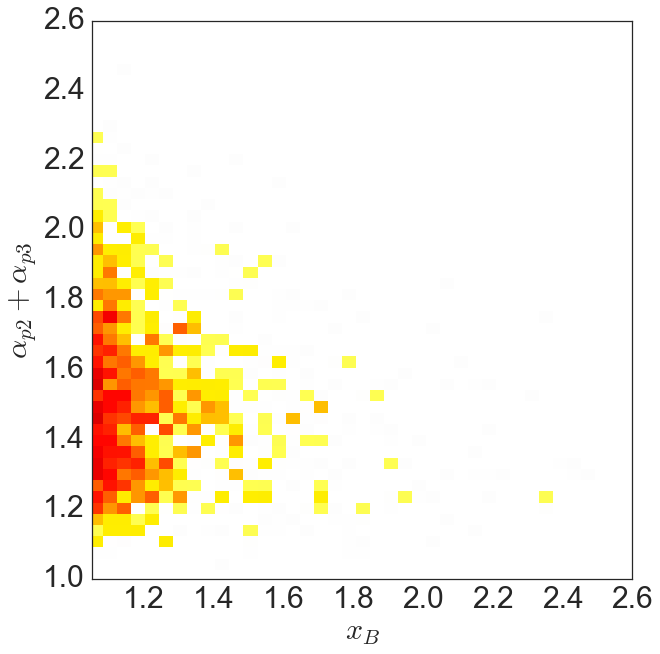

In [12]:
fig , ax = plt.subplots(figsize = [12,10])
h, xedges, yedges = np.histogram2d(ppnothing['Xb'] , 
                                   np.concatenate(ppnothing['alpha[0]']+ppnothing['alpha[1]']), bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(h.T, extent=extent, interpolation='none', origin='lower',cmap='hot_r',norm=LogNorm())
# ax.scatter( ppp_src_alltargets['Xb'],
#             ppp_src_alltargets['alpha[1]']+ppp_src_alltargets['alpha[2]'],label='ppp candidates',
#             color = 'blue',
#            s=70) 
pt.set_axes(ax , '$x_B$' , '$\\alpha_{p2}+\\alpha_{p3}$' , fontsize=30)
plt.legend(fontsize=20)
ax.set_xlim(1.05,2.6)
ax.set_ylim(1,2.6)

In [ ]:
# plot_hist1d_ppp( 'Pmiss.P()', 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' );

In [ ]:
# plot_hist1d_ppp( 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

In [ ]:
# plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

In [ ]:
# plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pcm.Mag()', 0 , 4 , 35 , '$\\sqrt{(p^{\mu}_{lead}-q^{\mu}+p^{\mu}_2+p^{\mu}_3)^{2}}$ [GeV/c$^{2}$]' )

In [ ]:
# plot_hist2d_ppp( 'p_over_q' , 0 , 1.5 , 35 , 'p/q' , 'theta_pq', 0 , 100 , 100 , '$\\theta(p,q)$ [deg.]' )

In [ ]:
# plot_col2d( 'protons.P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )
# plot_hist2d_ppp( 'protons[0].P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep[0]', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )

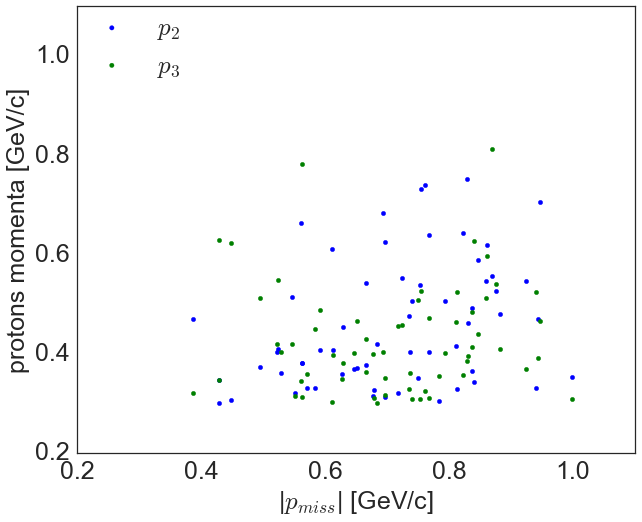

In [9]:
# p1/p2 vs. p(miss) - to show a typical event 
fig = plt.figure(figsize = [10,8])
ax = plt.subplot(111)
# plt.scatter(ppp_src_alltargets['Pmiss.P()'], ppp_src_alltargets['protons[0].P()'] , color='red' , label='$p_{lead}$')
plt.scatter(ppp_src_alltargets['Pmiss.P()'], ppp_src_alltargets['protons[1].P()'] , color='blue' , label='$p_2$')
plt.scatter(ppp_src_alltargets['Pmiss.P()'], ppp_src_alltargets['protons[2].P()'] , color='green', label='$p_3$')
ax.set_xlabel('|$p_{miss}$| [GeV/c]',fontsize=25)
ax.set_ylabel('protons momenta [GeV/c]',fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
plt.legend(loc='upper left', borderaxespad=0.,fontsize=25)
ax.set_xlim(0.2,1.1)
ax.set_ylim(0.2,1.1)
plt.show()
fig.savefig( dirname + "/ppp_p2p3_vs_pmiss.pdf" )

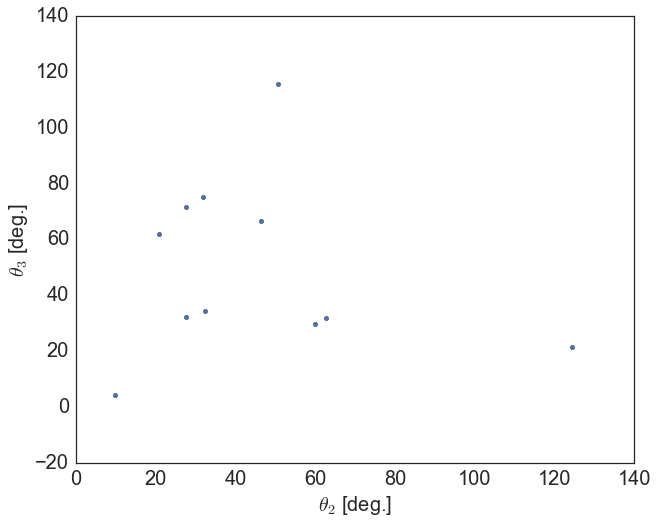

In [14]:
fig , ax = plt.subplots(figsize = [10,8])
plt.hist( ppp_src['TMath::RadToDeg()*protons[1].Theta()'],ppp_src['TMath::RadToDeg()*protons[2].Theta()'] ) # , 0 , 180 ,100 ,  '$\\theta_2$ [deg.]' , 
pt.set_axes(ax , '$\\theta_2$ [deg.]' , '$\\theta_3$ [deg.]')

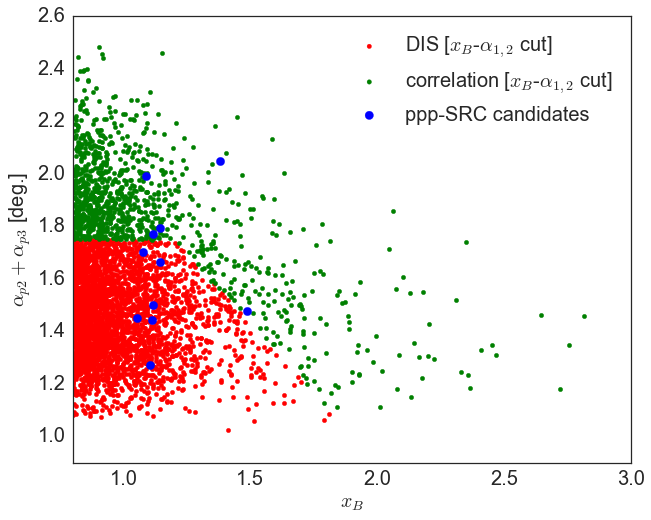

In [17]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppnothing_DIS['Xb'],
            ppnothing_DIS['alpha[0]']+ppnothing_DIS['alpha[1]'] ,
            label = 'DIS [$x_B$-$\\alpha_{1,2}$ cut]',
            color = 'red')  
plt.scatter( ppnothing_Correlation['Xb'],
            ppnothing_Correlation['alpha[0]']+ppnothing_Correlation['alpha[1]'] ,
            label = 'correlation [$x_B$-$\\alpha_{1,2}$ cut]',
            color = 'green')  
plt.scatter( ppp_src['Xb'],
            ppp_src['alpha[1]']+ppp_src['alpha[2]'],
            color = 'blue',
            label = 'ppp-SRC candidates',
            s=70) 
pt.set_axes(ax , '$x_B$' , '$\\alpha_{p2}+\\alpha_{p3}$ [deg.]')
plt.legend(fontsize=20)
ax.set_xlim(0.8,3.0)
ax.set_ylim(0.9,2.6)
fig.savefig('/Users/erezcohen/Desktop/ppp_and_ppnothing_xB_alpha_12.pdf')

average alpha(3N) =  [ 2.87767736]


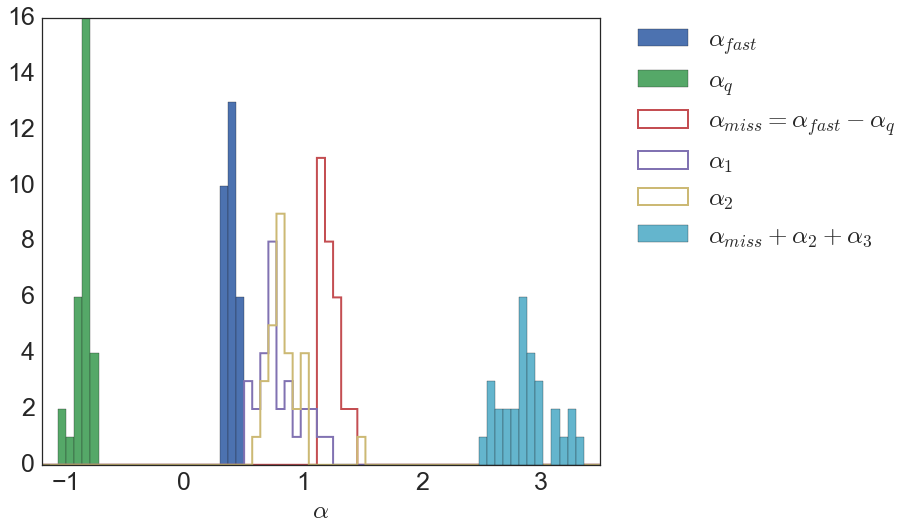

In [6]:
fig , ax = plt.subplots(figsize =(10,8))
bins = np.linspace(-1.2,3.5,70)
plt.hist( ppp_src_anglescut['alpha[0]'], bins=bins , label = '$\\alpha_{fast}$')
plt.hist( ppp_src_anglescut['alpha_q'] , bins=bins , label = '$\\alpha_{q}$')
plt.hist( ppp_src_anglescut['alpha[0]']-ppp_src_anglescut['alpha_q'] , histtype='step', bins=bins , label = '$\\alpha_{miss}=\\alpha_{fast}-\\alpha_{q}$', linewidth=2)
plt.hist( ppp_src_anglescut['alpha[1]'] , histtype='step', bins=bins , label = '$\\alpha_{1}$' , linewidth=2)
plt.hist( ppp_src_anglescut['alpha[2]'] , histtype='step', bins=bins , label = '$\\alpha_{2}$', linewidth=2)

plt.hist( ppp_src_anglescut['alpha[0]']-ppp_src_anglescut['alpha_q']+ppp_src_anglescut['alpha[1]']+ppp_src_anglescut['alpha[2]'] , bins=bins , label='$\\alpha_{miss}+\\alpha_{2}+\\alpha_{3}$')
plt.legend(fontsize=25,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(-1.2,3.5)
pt.set_axes(ax , '$\\alpha$' , '')
print 'average alpha(3N) = ', np.average(ppp_src_anglescut['alpha[0]']-ppp_src_anglescut['alpha_q']+ppp_src_anglescut['alpha[1]']+ppp_src_anglescut['alpha[2]'])

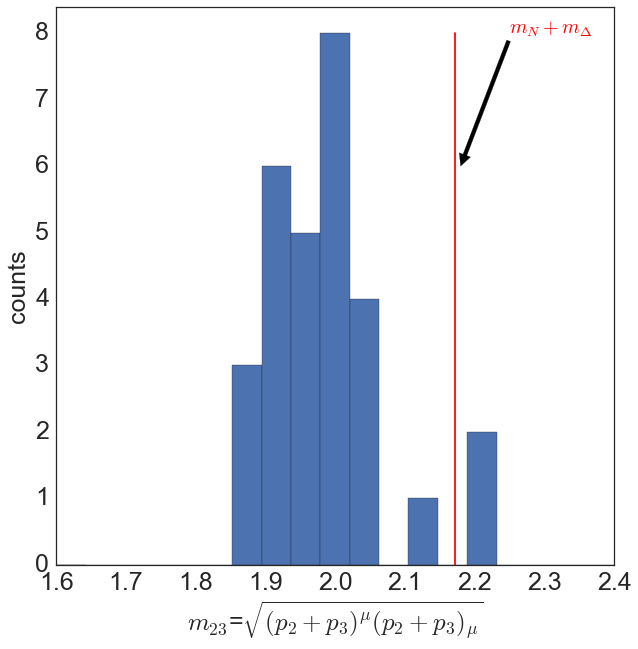

In [26]:
ax , h , bins , patches = plot_1d_hist( ppp_src_anglescut['sqrt( (protons[1].E()+protons[2].E())**2 - (protons[1].Px()+protons[2].Px())**2 - (protons[1].Py()+protons[2].Py())**2 - (protons[1].Pz()+protons[2].Pz())**2 )'] , 
             bins=np.linspace(1.6,2.4,20) , histtype='bar',
             xlabel='$m_{23}$=$\\sqrt{(p_2+p_3)^{\\mu}(p_2+p_3)_{\\mu}}$' , ylabel='counts' , figsize=(10,10) , fontsize=25 );
line = plt.Line2D(xdata=[0.940+1.232,0.940+1.232],ydata=[0,8],color='red')
ax.add_line(line)
# text = text.Text(x=0.940+1.232, y=7, text='d', color='red')
# ax.annotate(text)
ax.annotate('$m_N+m_{\\Delta}$', xy=(2.18,6), xytext=(2.25, 8),fontsize=20,color='red',
            arrowprops=dict(facecolor='black', shrink=5))


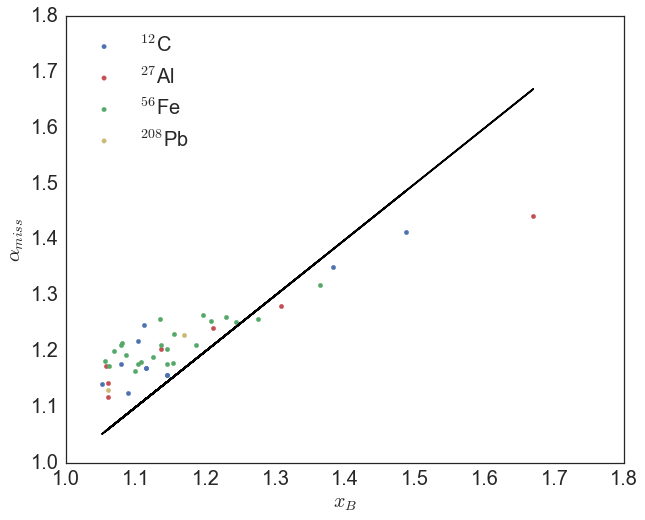

In [20]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src_c12['Xb'], ppp_src_c12['alpha[0]']-ppp_src_c12['alpha_q'] , color='b', label='$^{12}$C')  
plt.scatter( ppp_src_al27['Xb'], ppp_src_al27['alpha[0]']-ppp_src_al27['alpha_q'] , color='r' , label='$^{27}$Al')  
plt.scatter( ppp_src_fe56['Xb'], ppp_src_fe56['alpha[0]']-ppp_src_fe56['alpha_q'] , color='g' , label='$^{56}$Fe')  
plt.scatter( ppp_src_pb208['Xb'], ppp_src_pb208['alpha[0]']-ppp_src_pb208['alpha_q'] , color='y' , label='$^{208}$Pb')  

pt.set_axes(ax , '$x_B$' , '$\\alpha_{miss}$')
plt.legend(fontsize=20,loc='upper left')
plt.plot(ppp_src_alltargets['Xb'],ppp_src_alltargets['Xb'],color='black')

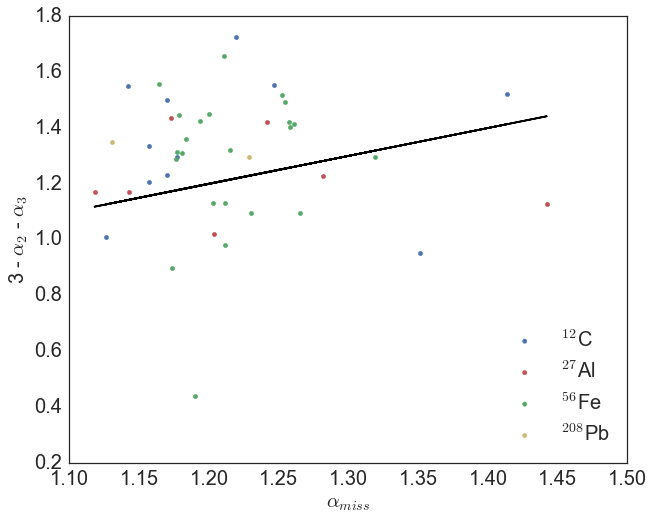

In [22]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src_c12['alpha[0]']-ppp_src_c12['alpha_q'], 3 - ppp_src_c12['alpha[1]'] - ppp_src_c12['alpha[2]'] , color='b', label='$^{12}$C')  
plt.scatter( ppp_src_al27['alpha[0]']-ppp_src_al27['alpha_q'], 3 - ppp_src_al27['alpha[1]']-ppp_src_al27['alpha[2]'] , color='r' , label='$^{27}$Al')  
plt.scatter( ppp_src_fe56['alpha[0]']-ppp_src_fe56['alpha_q'], 3 - ppp_src_fe56['alpha[1]']-ppp_src_fe56['alpha[2]'] , color='g' , label='$^{56}$Fe')  
plt.scatter( ppp_src_pb208['alpha[0]']-ppp_src_pb208['alpha_q'],3 -  ppp_src_pb208['alpha[1]']-ppp_src_pb208['alpha[2]'] , color='y' , label='$^{208}$Pb')  
pt.set_axes(ax , '$\\alpha_{miss}$' , '3 - $\\alpha_{2}$ - $\\alpha_{3}$')

plt.plot(ppp_src_alltargets['alpha[0]']-ppp_src_alltargets['alpha_q'],ppp_src_alltargets['alpha[0]']-ppp_src_alltargets['alpha_q'],color='black')
plt.legend(fontsize=20,loc='lower right')

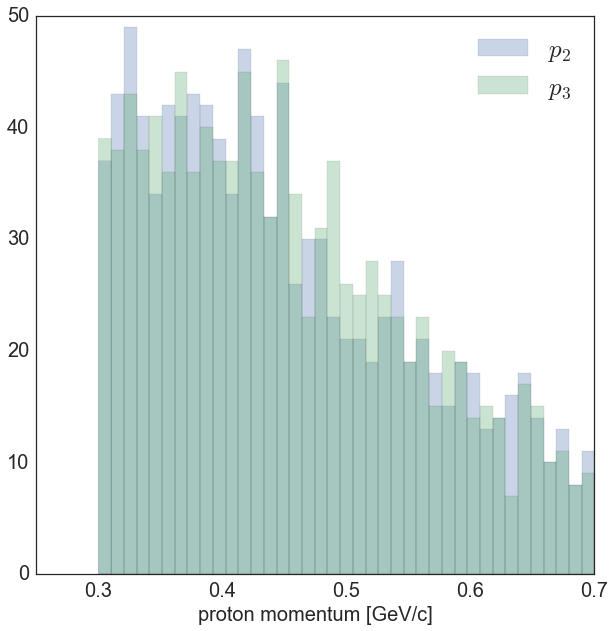

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(ppnothing_Correlation['protons[0].P()'],bins=np.linspace(0.3,0.7,40),label='$p_2$',alpha=0.3)
plt.hist(ppnothing_Correlation['protons[1].P()'],bins=np.linspace(0.3,0.7,40),label='$p_3$',alpha=0.3)
plt.legend(fontsize=25)
pt.set_axes(ax,'proton momentum [GeV/c]','')

(array([  73.,   71.,   78.,   97.,   69.,   87.,   87.,   80.,   66.,
          85.,   82.,   87.,   80.,   92.,   85.,   73.,   82.,   96.,
         100.,   80.,   80.,   79.,   92.,   85.,   86.,   96.,   90.,
          91.,   81.,   70.,   62.,   69.,   86.,   74.,   72.,   69.,
          87.,   74.,   57.]),
 array([ 0.3       ,  0.31025641,  0.32051282,  0.33076923,  0.34102564,
         0.35128205,  0.36153846,  0.37179487,  0.38205128,  0.39230769,
         0.4025641 ,  0.41282051,  0.42307692,  0.43333333,  0.44358974,
         0.45384615,  0.46410256,  0.47435897,  0.48461538,  0.49487179,
         0.50512821,  0.51538462,  0.52564103,  0.53589744,  0.54615385,
         0.55641026,  0.56666667,  0.57692308,  0.58717949,  0.5974359 ,
         0.60769231,  0.61794872,  0.62820513,  0.63846154,  0.64871795,
         0.65897436,  0.66923077,  0.67948718,  0.68974359,  0.7       ]),
 <a list of 39 Patch objects>)

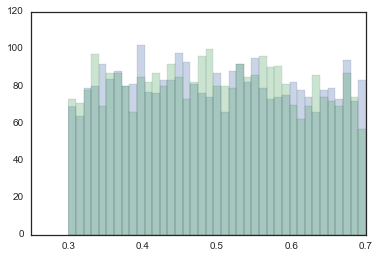

In [26]:
plt.hist(ppnothing_DIS['protons[0].P()'],bins=np.linspace(0.3,0.7,40),label='$p_2$',alpha=0.3)
plt.hist(ppnothing_DIS['protons[1].P()'],bins=np.linspace(0.3,0.7,40),label='$p_3$',alpha=0.3)

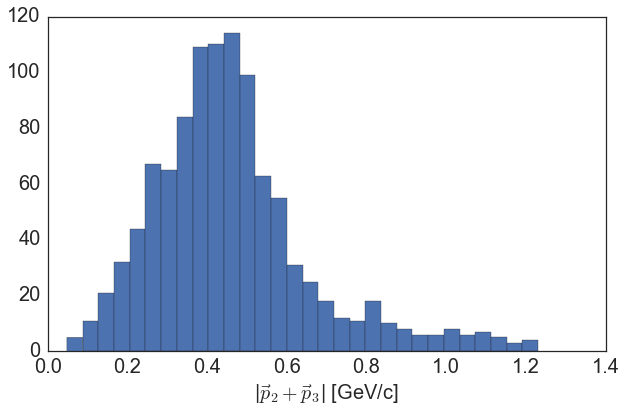

In [45]:
fig,ax=plt.subplots(figsize=(10,6))
plt.hist(ppnothing_Correlation['PcmFinalState.P()'],bins=30)
pt.set_axes(ax,'|$\\vec{p}_2+\\vec{p}_3$| [GeV/c]','')

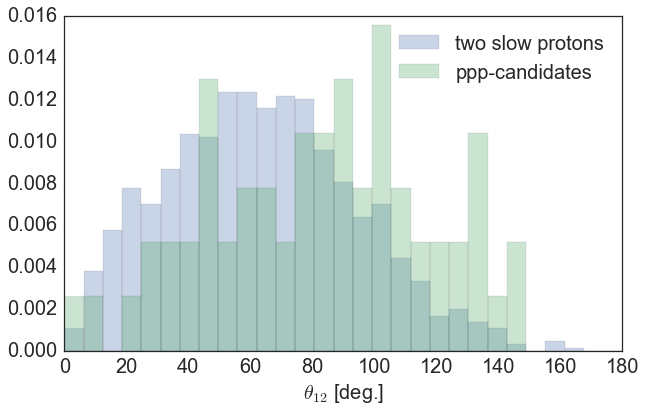

In [127]:
fig,ax=plt.subplots(figsize=(10,6))
plt.hist(ppnothing_Correlation['TMath::RadToDeg()*protons[1].Theta()'],bins=np.linspace(0,180,30) , label='two slow protons',normed=1,alpha=0.3)
plt.hist(ppp_src_alltargets['TMath::RadToDeg()*acos((protons[1].Px()*protons[2].Px()+protons[1].Py()*protons[2].Py()+protons[1].Pz()*protons[2].Pz())/(protons[1].P()*protons[2].P()))'],bins=np.linspace(0,180,30) , label='ppp-candidates',normed=1,alpha=0.3)
plt.legend(fontsize=20)
pt.set_axes(ax,'$\\theta_{12}$ [deg.]','')

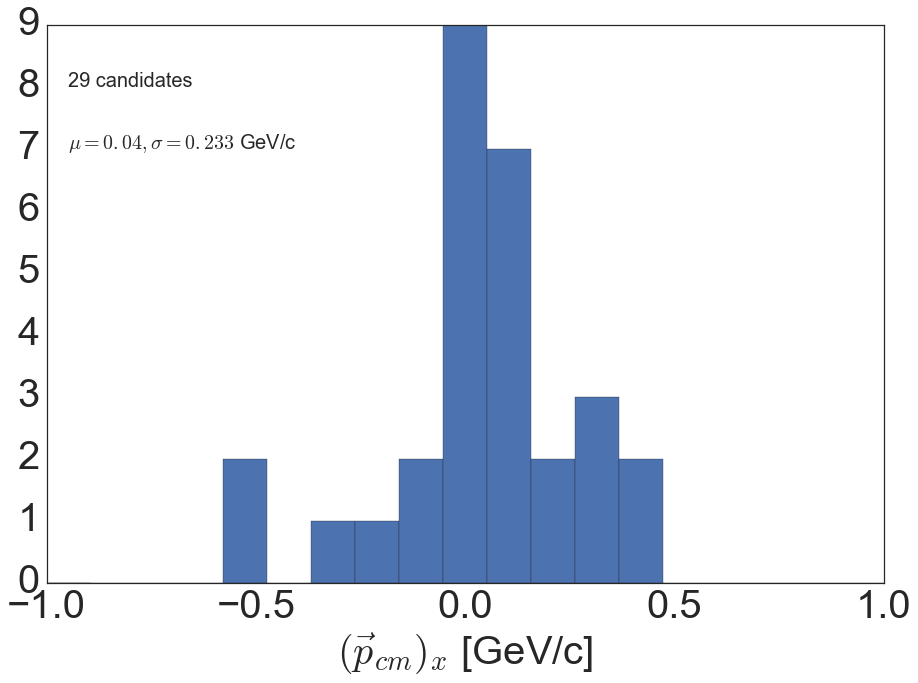

In [39]:
direction = 'x'
mean_ppp = np.mean(ppp_src_anglescut['Pcm.P%s()'%direction])
std_ppp = np.std(ppp_src_anglescut['Pcm.P%s()'%direction])
# mean_mixed = np.mean(ppp_mixed_alltargets['Pcm.P%s()'%direction])
# std_mixed = np.std(ppp_mixed_alltargets['Pcm.P%s()'%direction])

fig,ax=plt.subplots(figsize=(15,10))
plt.hist(ppp_src_anglescut['Pcm.P%s()'%direction],bins=np.linspace(-1,1,20) ,label='ppp-candidates',alpha=1)
plt.text(-0.95,8,'%d candidates'%len(ppp_src_anglescut),fontsize=20)
plt.text(-0.95,7,'$\\mu=%.2f,\\sigma=%.3f$ GeV/c'%(mean_ppp,std_ppp),fontsize=20)
# plt.hist(ppp_mixed_alltargets['Pcm.P%s()'%direction],bins=np.linspace(-1,1,30) , label='mixed scheme',histtype='step',linewidth=2,normed=1,alpha=1,color='red')
# plt.text(-0.95,1.4,'$\\mu=%.2f,\\sigma=%.3f$ GeV/c'%(mean_mixed,std_mixed),color='red',fontsize=20)

# plt.legend(fontsize=20,loc='upper left')
pt.set_axes(ax,'$(\\vec{p}_{cm})_{%s}$ [GeV/c]'%direction,'',fontsize=40)

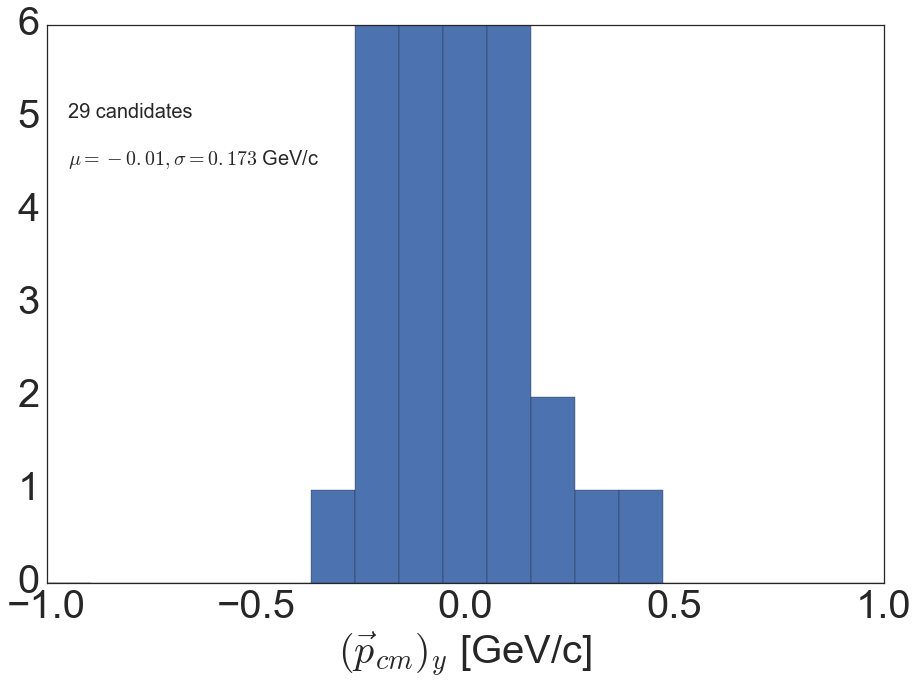

In [38]:
direction = 'y'
mean_ppp = np.mean(ppp_src_anglescut['Pcm.P%s()'%direction])
std_ppp = np.std(ppp_src_anglescut['Pcm.P%s()'%direction])
# mean_mixed = np.mean(ppp_mixed_alltargets['Pcm.P%s()'%direction])
# std_mixed = np.std(ppp_mixed_alltargets['Pcm.P%s()'%direction])

fig,ax=plt.subplots(figsize=(15,10))
plt.hist(ppp_src_anglescut['Pcm.P%s()'%direction],bins=np.linspace(-1,1,20) ,label='ppp-candidates',alpha=1)
plt.text(-0.95,5,'%d candidates'%len(ppp_src_anglescut),fontsize=20)
plt.text(-0.95,4.5,'$\\mu=%.2f,\\sigma=%.3f$ GeV/c'%(mean_ppp,std_ppp),fontsize=20)
# plt.hist(ppp_mixed_alltargets['Pcm.P%s()'%direction],bins=np.linspace(-1,1,30) , label='mixed scheme',histtype='step',linewidth=2,normed=1,alpha=1,color='red')
# plt.text(-0.95,1.4,'$\\mu=%.2f,\\sigma=%.3f$ GeV/c'%(mean_mixed,std_mixed),color='red',fontsize=20)

# plt.legend(fontsize=20,loc='upper left')
pt.set_axes(ax,'$(\\vec{p}_{cm})_{%s}$ [GeV/c]'%direction,'',fontsize=40)

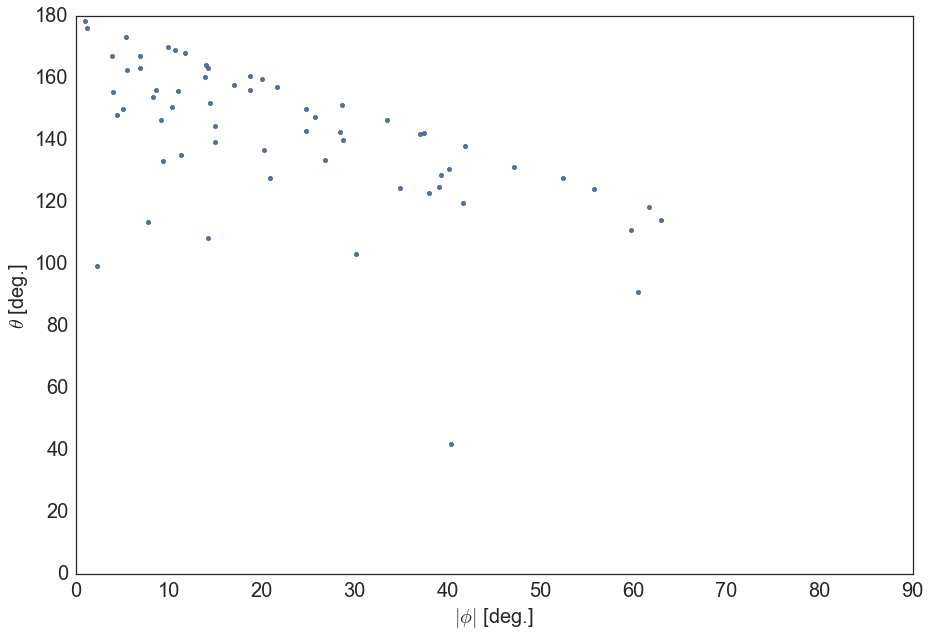

In [24]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(np.abs(ppp_src_alltargets['phiMiss23']),ppp_src_alltargets['OpeningAngle'])
ax.set_xlim(0,90)
ax.set_ylim(0,180)
pt.set_axes(ax,'$|\\phi|$ [deg.]','$\\theta$ [deg.]')

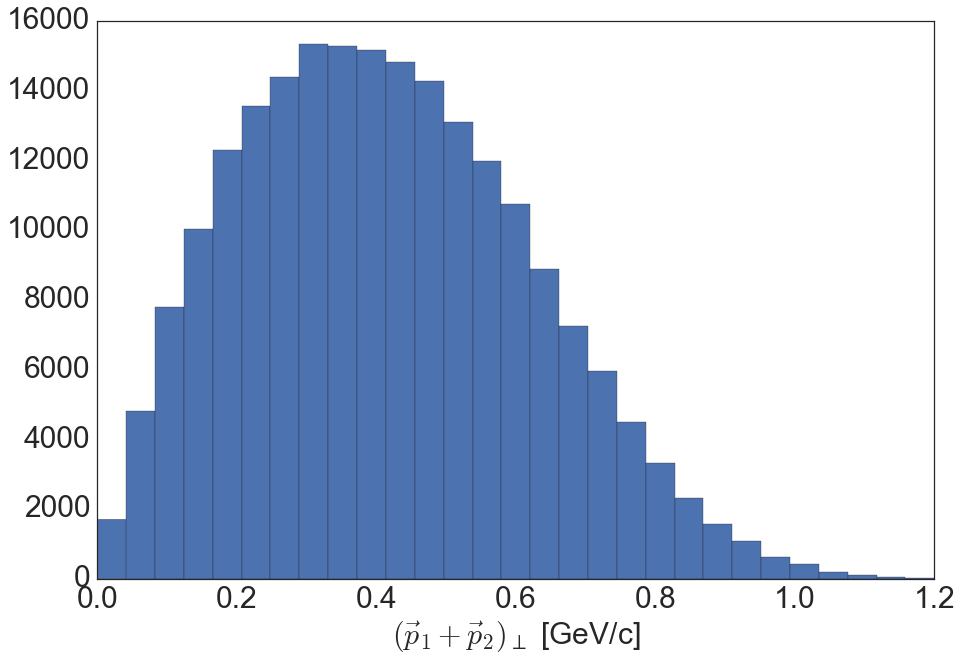

In [59]:
fig,ax=plt.subplots(figsize=(15,10))
plt.hist(pp_all['PcmFinalState.Pt()'],bins=np.linspace(0,1.2,30))
plt.legend(fontsize=20)
pt.set_axes(ax,'$(\\vec{p}_{1}+\\vec{p}_{2})_{\\perp}$ [GeV/c]','',fontsize=30)

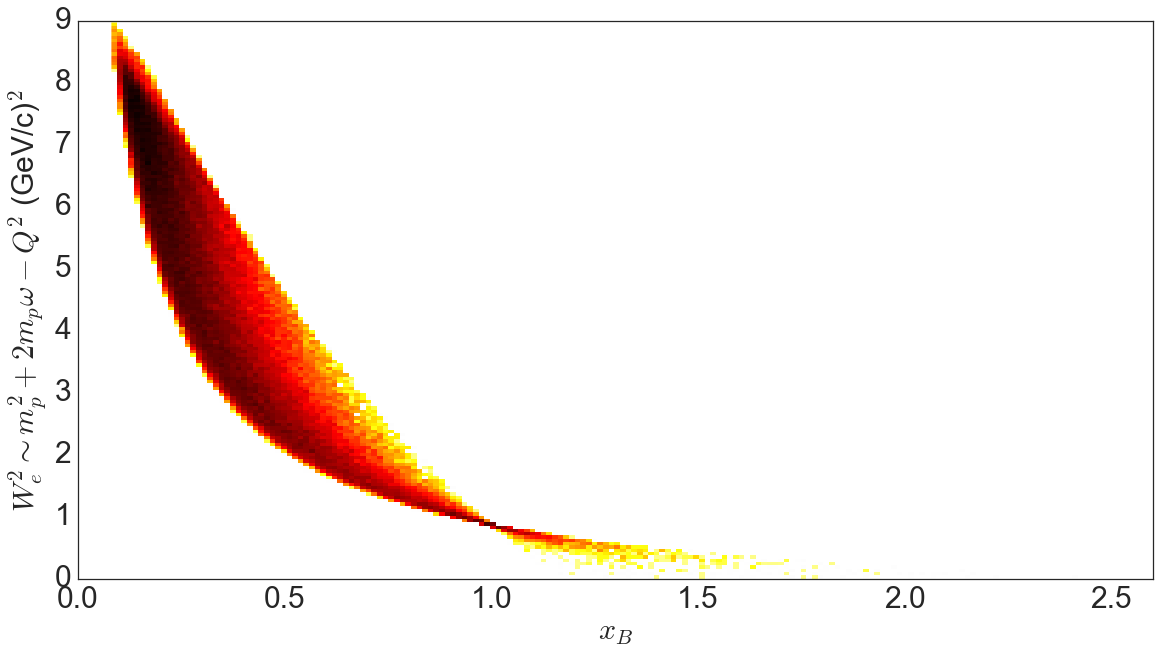

In [90]:

fig , ax = plt.subplots(figsize = (20,10))
h, xedges, yedges = np.histogram2d(pp_all['Xb'] , 
                                   pp_all['0.938*0.938 + 2*0.938*q.E() - Q2'], bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(h.T, extent=extent, interpolation='none', origin='lower',cmap='hot_r',norm=LogNorm())
pt.set_axes(ax , '$x_B$' , '$W_e^2 \sim m_p^2 + 2m_p\\omega - Q^2$ (GeV/c)$^2$' , fontsize=30)
plt.legend(fontsize=20)
ax.set_xlim(0,2.6)
ax.set_ylim(0,9)
ax.set_aspect(0.15)